# Задача классификации

## Описание задачи
Обучение модели для предсказания факта того, является ли человек здоровым или нет.
Данные о здоровье берутся из столбца `Medical Condition` и в качестве статуса "Здоровый" берется `Healthy`.

## Датасет

https://www.kaggle.com/datasets/abdallaahmed77/healthcare-risk-factors-dataset

Датасет содержит 30'000 записей. Выбираем только определённые столбцы:
- `Age` - возраст пациента в годах
- `Gender` - пол пациента (`Male` или `Female`)
- `Medical Condition` - состояние здоровья (`Healthy`, `Diabetes`, `Asthma`, `Obesity`, `Hypertension`, `Cancer`, `Arthritis`)
- `Glucose` - уровень глюкозы (сахара) в крови
- `Blood Pressure` - артериальное давление
- `BMI` - индекс массы тела
- `Oxygen Saturation` - уровень насыщения крови кислородом
- `Cholesterol` - уровень холестерина
- `Triglycerides` - уровень триглицеридов
- `HbA1c` - гемоглобин A1c (гликозилированный гемоглобин)
- `Smoking` - курящий человек (`0` - некурящий, `1` - курящий)
- `Alcohol` - пьющий человек (`0` - непьющий, `1` - пьющий)
- `Physical Activity` - физическая активность (примерное количество часов в неделю)
- `Diet Score` - оценка качества диеты (число)
- `Family History` - семейная история болезней (`0` - нет, `1` - есть)
- `Stress Level` - уровень стресса (число)
- `Sleep hours` - среднее количество часов сна в день

## Import

In [380]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [381]:
prediction_column = "Medical Condition"
prediction_value = "Healthy"
table_category_columns = ["Gender", "Medical Condition"]
table_binary_category_columns = ["Smoking", "Alcohol", "Family History"]
table = pd.read_csv("healthcare_dataset.csv").drop(["random_notes", "noise_col", "LengthOfStay"], axis=1)
table_num_columns = list((set(table.columns.to_list()) - set(table_category_columns)) - set(table_binary_category_columns))
np.random.seed(42)
table

,Age,Gender,Medical Condition,Glucose,Blood Pressure,BMI,Oxygen Saturation,Cholesterol,Triglycerides,HbA1c,Smoking,Alcohol,Physical Activity,Diet Score,Family History,Stress Level,Sleep Hours
0,46.0,Male,Diabetes,137.04,135.27,28.90,96.04,231.88,210.56,7.61,0,0,-0.20,3.54,0,5.07,6.05
1,22.0,Male,Healthy,71.58,113.27,26.29,97.54,165.57,129.41,4.91,0,0,8.12,5.90,0,5.87,7.72
2,50.0,NaN,Asthma,95.24,NaN,22.53,90.31,214.94,165.35,5.60,0,0,5.01,4.65,1,3.09,4.82
3,57.0,NaN,Obesity,NaN,130.53,38.47,96.60,197.71,182.13,6.92,0,0,3.16,3.37,0,3.01,5.33
4,66.0,Female,Hypertension,95.15,178.17,31.12,94.90,259.53,115.85,5.98,0,1,3.56,3.40,0,6.38,6.64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,54.0,Female,Healthy,86.35,127.68,28.30,94.36,218.60,152.82,4.85,0,0,9.15,10.35,0,3.65,8.71
29996,41.0,Male,Asthma,89.24,154.37,24.93,96.07,198.30,176.81,5.36,1,0,3.34,3.40,0,6.72,2.81
29997,83.0,Female,NaN,NaN,170.11,30.55,97.83,210.13,168.76,5.05,0,0,4.53,4.50,0,4.31,3.61
29998,41.0,Male,Diabetes,242.87,152.97,23.57,99.17,208.86,224.21,7.59,0,0,3.16,2.59,0,7.10,5.80


In [382]:
table.describe()

,Age,Glucose,Blood Pressure,BMI,Oxygen Saturation,Cholesterol,Triglycerides,HbA1c,Smoking,Alcohol,Physical Activity,Diet Score,Family History,Stress Level,Sleep Hours
count,25500.000000,25500.000000,25500.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,54.616784,123.622179,140.455337,28.476155,94.954992,213.033891,176.837375,6.294377,0.279767,0.238533,3.803214,4.029654,0.439433,5.917312,6.229836
std,15.973618,41.576943,21.077933,5.728804,3.736202,33.519757,48.812827,1.320269,0.448892,0.426194,2.011729,1.817165,0.496326,2.225057,1.187669
min,10.000000,20.320000,74.240000,7.670000,67.510000,95.730000,-22.480000,3.280000,0.000000,0.000000,-3.680000,-1.750000,0.000000,-2.440000,1.590000
25%,45.000000,96.280000,125.140000,24.590000,93.000000,189.500000,141.280000,5.330000,0.000000,0.000000,2.350000,2.770000,0.000000,4.370000,5.410000
50%,55.000000,110.500000,138.320000,28.050000,95.300000,211.835000,173.365000,5.970000,0.000000,0.000000,3.590000,3.790000,0.000000,5.900000,6.230000
75%,66.000000,136.610000,153.790000,31.810000,97.380000,235.310000,208.630000,6.920000,1.000000,0.000000,5.060000,5.020000,1.000000,7.440000,7.050000
max,89.000000,318.510000,226.380000,56.850000,110.070000,358.370000,421.510000,12.360000,1.000000,1.000000,12.410000,12.060000,1.000000,15.450000,10.350000


In [383]:
table.loc[:, ["Gender", "Medical Condition"]].describe()

,Gender,Medical Condition
count,25500,25500
unique,2,7
top,Female,Hypertension
freq,12865,7120


In [384]:
table.loc[:, ["Medical Condition"]].value_counts(normalize=True)

Medical Condition
Hypertension         0.279216
Diabetes             0.251647
Obesity              0.151255
Healthy              0.119176
Asthma               0.079882
Arthritis            0.070431
Cancer               0.048392
Name: proportion, dtype: float64

In [385]:
table.describe()

,Age,Glucose,Blood Pressure,BMI,Oxygen Saturation,Cholesterol,Triglycerides,HbA1c,Smoking,Alcohol,Physical Activity,Diet Score,Family History,Stress Level,Sleep Hours
count,25500.000000,25500.000000,25500.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,54.616784,123.622179,140.455337,28.476155,94.954992,213.033891,176.837375,6.294377,0.279767,0.238533,3.803214,4.029654,0.439433,5.917312,6.229836
std,15.973618,41.576943,21.077933,5.728804,3.736202,33.519757,48.812827,1.320269,0.448892,0.426194,2.011729,1.817165,0.496326,2.225057,1.187669
min,10.000000,20.320000,74.240000,7.670000,67.510000,95.730000,-22.480000,3.280000,0.000000,0.000000,-3.680000,-1.750000,0.000000,-2.440000,1.590000
25%,45.000000,96.280000,125.140000,24.590000,93.000000,189.500000,141.280000,5.330000,0.000000,0.000000,2.350000,2.770000,0.000000,4.370000,5.410000
50%,55.000000,110.500000,138.320000,28.050000,95.300000,211.835000,173.365000,5.970000,0.000000,0.000000,3.590000,3.790000,0.000000,5.900000,6.230000
75%,66.000000,136.610000,153.790000,31.810000,97.380000,235.310000,208.630000,6.920000,1.000000,0.000000,5.060000,5.020000,1.000000,7.440000,7.050000
max,89.000000,318.510000,226.380000,56.850000,110.070000,358.370000,421.510000,12.360000,1.000000,1.000000,12.410000,12.060000,1.000000,15.450000,10.350000


### Избавляемся от некорректных значений

Считаем, что отрицательное значение этих столбцов - пропущенные значения

In [386]:
for e in ("Physical Activity", "Triglycerides", "Stress Level", "Diet Score"):
    table[e] = table[e].mask(table[e] < 0.0, np.nan)

### Пропущенные значения для рассматриваемого признака

In [387]:
table.isna().sum()[table.isna().sum() > 0]

Age                  4500
Gender               4500
Medical Condition    4500
Glucose              4500
Blood Pressure       4500
Triglycerides           4
Physical Activity     302
Diet Score            105
Stress Level           67
dtype: int64

In [388]:
table = table.dropna(subset=[prediction_column])

In [389]:
table.isna().sum()[table.isna().sum() > 0]

Age                  3821
Gender               3794
Glucose              3788
Blood Pressure       3800
Triglycerides           4
Physical Activity     268
Diet Score             87
Stress Level           55
dtype: int64

### Рассмотрим выбросы

In [390]:
table_small = table.loc[:, table_num_columns]
for v in table_num_columns:
    table_small = table_small[table_small[v] != ""]
table_small = table_small.astype(np.float64)
z_scores = np.abs((table_small - table_small.mean()) / table_small.std())
table_small["OUTLIER"] = z_scores.apply(lambda row: 'Yes' if any(row > 3) else 'No', axis=1)
table_small["OUTLIER"].value_counts(normalize=True)

OUTLIER
No     0.940863
Yes    0.059137
Name: proportion, dtype: float64

Выбросов немного, оставим как есть.

### Добавим столбец `Healthy`

In [391]:
table_copy = table.copy()
table_copy.loc[:, prediction_value] = (table[prediction_column] == prediction_value).astype(np.int64)
table = table_copy

table_binary_category_columns.append(prediction_value)
table

,Age,Gender,Medical Condition,Glucose,Blood Pressure,BMI,Oxygen Saturation,Cholesterol,Triglycerides,HbA1c,Smoking,Alcohol,Physical Activity,Diet Score,Family History,Stress Level,Sleep Hours,Healthy
0,46.0,Male,Diabetes,137.04,135.27,28.90,96.04,231.88,210.56,7.61,0,0,NaN,3.54,0,5.07,6.05,0
1,22.0,Male,Healthy,71.58,113.27,26.29,97.54,165.57,129.41,4.91,0,0,8.12,5.90,0,5.87,7.72,1
2,50.0,NaN,Asthma,95.24,NaN,22.53,90.31,214.94,165.35,5.60,0,0,5.01,4.65,1,3.09,4.82,0
3,57.0,NaN,Obesity,NaN,130.53,38.47,96.60,197.71,182.13,6.92,0,0,3.16,3.37,0,3.01,5.33,0
4,66.0,Female,Hypertension,95.15,178.17,31.12,94.90,259.53,115.85,5.98,0,1,3.56,3.40,0,6.38,6.64,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29994,76.0,NaN,Hypertension,97.17,138.92,25.65,93.99,235.65,238.26,6.43,0,0,3.14,3.46,0,6.66,6.10,0
29995,54.0,Female,Healthy,86.35,127.68,28.30,94.36,218.60,152.82,4.85,0,0,9.15,10.35,0,3.65,8.71,1
29996,41.0,Male,Asthma,89.24,154.37,24.93,96.07,198.30,176.81,5.36,1,0,3.34,3.40,0,6.72,2.81,0
29998,41.0,Male,Diabetes,242.87,152.97,23.57,99.17,208.86,224.21,7.59,0,0,3.16,2.59,0,7.10,5.80,0


## Визуализация данных

In [392]:
random_subset = np.random.choice(np.arange(table.shape[0]), size=2500, replace=False)
#sns.pairplot(table.iloc[random_subset], diag_kind="hist")
pass

In [393]:
corr_mat = table.drop(table_category_columns, axis=1).corr()
corr_mat

,Age,Glucose,Blood Pressure,BMI,Oxygen Saturation,Cholesterol,Triglycerides,HbA1c,Smoking,Alcohol,Physical Activity,Diet Score,Family History,Stress Level,Sleep Hours,Healthy
Age,1.000000,0.115983,0.327118,-0.009664,0.078976,0.174955,0.106685,0.099756,0.057789,0.041016,-0.128372,-0.165864,0.118704,0.170565,-0.078389,-0.258864
Glucose,0.115983,1.000000,0.058804,0.074702,0.001647,0.005123,0.068540,0.615178,-0.043869,-0.024385,-0.229001,-0.309258,0.156363,0.071369,-0.126685,-0.257930
Blood Pressure,0.327118,0.058804,1.000000,0.073727,0.009905,0.259596,0.187551,0.046559,0.116172,0.066734,-0.143427,-0.194936,0.112041,0.228178,-0.149636,-0.352804
BMI,-0.009664,0.074702,0.073727,1.000000,0.062100,0.126410,0.185290,0.127995,-0.004652,0.041548,-0.346574,-0.300353,0.058945,-0.009633,-0.023638,-0.294288
Oxygen Saturation,0.078976,0.001647,0.009905,0.062100,1.000000,-0.024648,-0.009129,-0.006818,-0.044558,0.014423,-0.016942,0.029095,-0.001016,-0.105114,0.169837,0.197352
Cholesterol,0.174955,0.005123,0.259596,0.126410,-0.024648,1.000000,0.179418,0.023936,0.082398,0.066727,-0.210329,-0.222102,0.072020,0.166227,-0.137577,-0.371187
Triglycerides,0.106685,0.068540,0.187551,0.185290,-0.009129,0.179418,1.000000,0.091173,0.053233,0.049715,-0.261818,-0.257703,0.064698,0.103338,-0.114179,-0.356321
HbA1c,0.099756,0.615178,0.046559,0.127995,-0.006818,0.023936,0.091173,1.000000,-0.043611,-0.014213,-0.279458,-0.345717,0.153941,0.058750,-0.122934,-0.306197
Smoking,0.057789,-0.043869,0.116172,-0.004652,-0.044558,0.082398,0.053233,-0.043611,1.000000,0.032120,-0.024485,-0.037386,0.019137,0.107116,-0.085140,-0.141148
Alcohol,0.041016,-0.024385,0.066734,0.041548,0.014423,0.066727,0.049715,-0.014213,0.032120,1.000000,-0.054123,-0.052850,0.014880,0.041629,-0.025912,-0.074536


<Axes: >

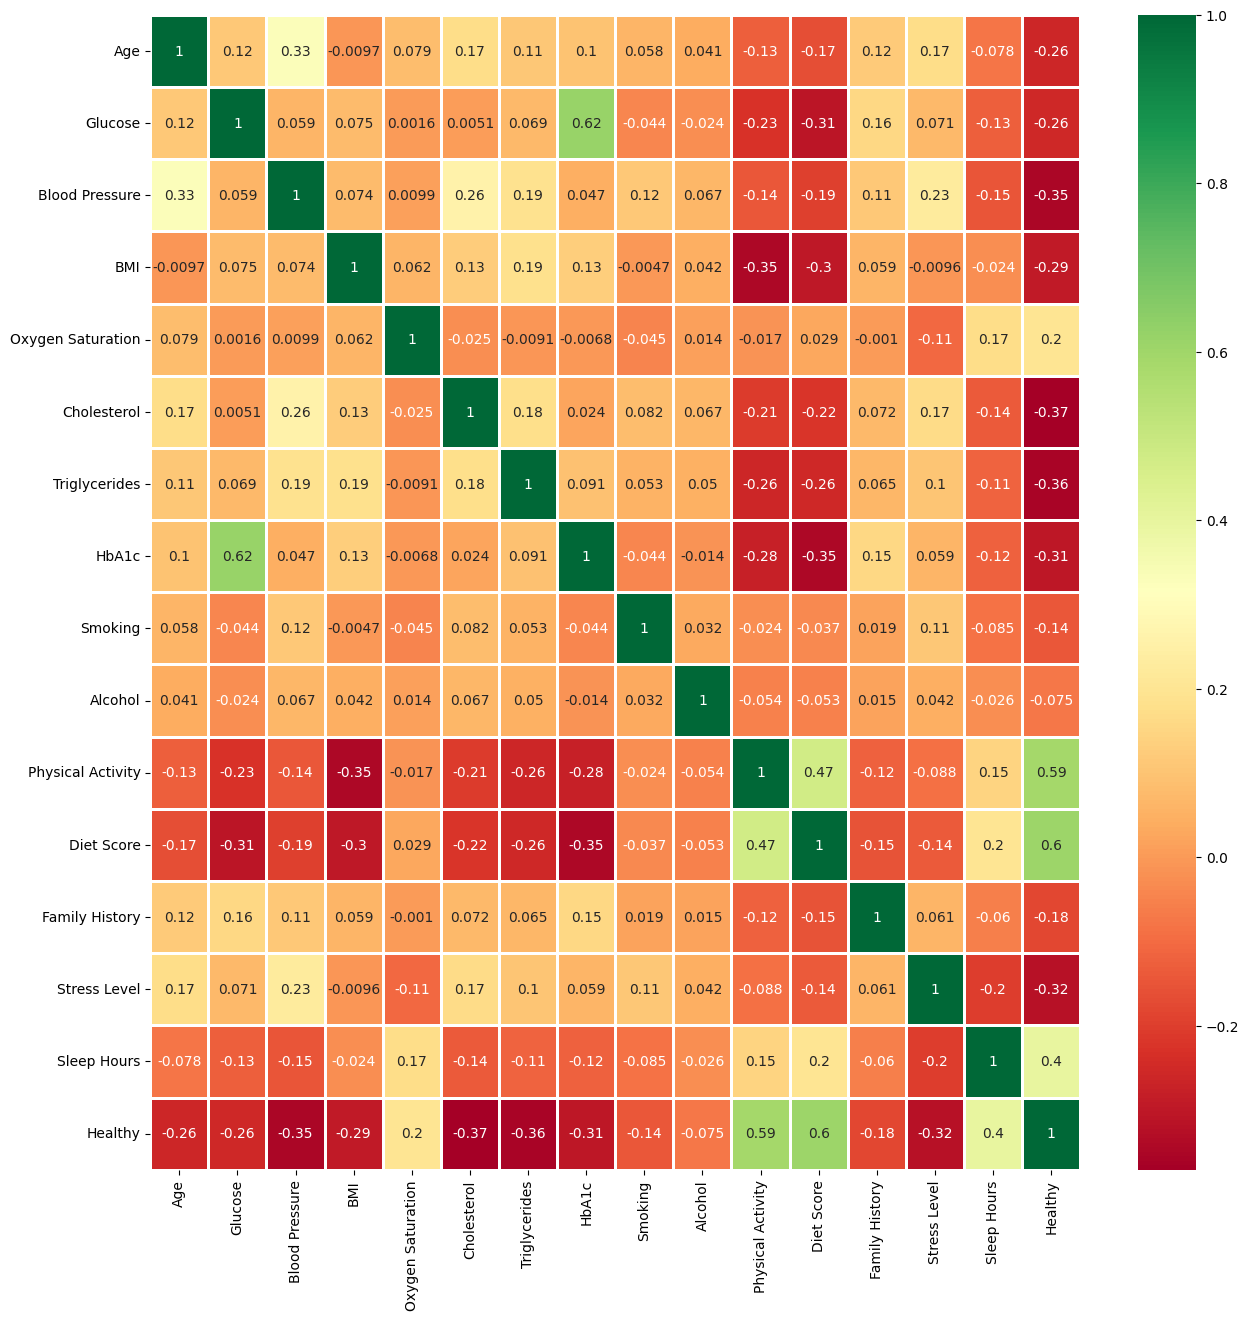

In [394]:
plt.figure(figsize=(15, 15))
sns.heatmap(corr_mat, cmap ='RdYlGn', linewidths=1, annot=True)

Видно, что `Healthy` сильно коррелирует с `Diet Score` и `Physical Activity`. Эти столбцы стоит убрать, иначе классификатор будет слишком сильно опираться именно на них.

In [395]:
values_too_correlate = ["Diet Score", "Physical Activity"]

## Остальные пропущенные значения
Категориальные заменим на моду, а числовые - на медиану.

In [396]:
for e in table_category_columns:
    table.loc[:, e] = table[e].fillna(table[e].mode()[0])

In [397]:
for e in table_num_columns:
    table.loc[:, e] = table[e].fillna(table[e].median())

In [398]:
table.isna().sum()[table.isna().sum() > 0]

Series([], dtype: int64)

In [399]:
table

,Age,Gender,Medical Condition,Glucose,Blood Pressure,BMI,Oxygen Saturation,Cholesterol,Triglycerides,HbA1c,Smoking,Alcohol,Physical Activity,Diet Score,Family History,Stress Level,Sleep Hours,Healthy
0,46.0,Male,Diabetes,137.04,135.270,28.90,96.04,231.88,210.56,7.61,0,0,3.62,3.54,0,5.07,6.05,0
1,22.0,Male,Healthy,71.58,113.270,26.29,97.54,165.57,129.41,4.91,0,0,8.12,5.90,0,5.87,7.72,1
2,50.0,Female,Asthma,95.24,138.285,22.53,90.31,214.94,165.35,5.60,0,0,5.01,4.65,1,3.09,4.82,0
3,57.0,Female,Obesity,110.51,130.530,38.47,96.60,197.71,182.13,6.92,0,0,3.16,3.37,0,3.01,5.33,0
4,66.0,Female,Hypertension,95.15,178.170,31.12,94.90,259.53,115.85,5.98,0,1,3.56,3.40,0,6.38,6.64,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29994,76.0,Female,Hypertension,97.17,138.920,25.65,93.99,235.65,238.26,6.43,0,0,3.14,3.46,0,6.66,6.10,0
29995,54.0,Female,Healthy,86.35,127.680,28.30,94.36,218.60,152.82,4.85,0,0,9.15,10.35,0,3.65,8.71,1
29996,41.0,Male,Asthma,89.24,154.370,24.93,96.07,198.30,176.81,5.36,1,0,3.34,3.40,0,6.72,2.81,0
29998,41.0,Male,Diabetes,242.87,152.970,23.57,99.17,208.86,224.21,7.59,0,0,3.16,2.59,0,7.10,5.80,0


## Векторизация категориальных признаков

In [400]:
table = pd.get_dummies(table, columns=["Gender"], drop_first=True, dtype=np.int64)
table

,Age,Medical Condition,Glucose,Blood Pressure,BMI,Oxygen Saturation,Cholesterol,Triglycerides,HbA1c,Smoking,Alcohol,Physical Activity,Diet Score,Family History,Stress Level,Sleep Hours,Healthy,Gender_Male
0,46.0,Diabetes,137.04,135.270,28.90,96.04,231.88,210.56,7.61,0,0,3.62,3.54,0,5.07,6.05,0,1
1,22.0,Healthy,71.58,113.270,26.29,97.54,165.57,129.41,4.91,0,0,8.12,5.90,0,5.87,7.72,1,1
2,50.0,Asthma,95.24,138.285,22.53,90.31,214.94,165.35,5.60,0,0,5.01,4.65,1,3.09,4.82,0,0
3,57.0,Obesity,110.51,130.530,38.47,96.60,197.71,182.13,6.92,0,0,3.16,3.37,0,3.01,5.33,0,0
4,66.0,Hypertension,95.15,178.170,31.12,94.90,259.53,115.85,5.98,0,1,3.56,3.40,0,6.38,6.64,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29994,76.0,Hypertension,97.17,138.920,25.65,93.99,235.65,238.26,6.43,0,0,3.14,3.46,0,6.66,6.10,0,0
29995,54.0,Healthy,86.35,127.680,28.30,94.36,218.60,152.82,4.85,0,0,9.15,10.35,0,3.65,8.71,1,0
29996,41.0,Asthma,89.24,154.370,24.93,96.07,198.30,176.81,5.36,1,0,3.34,3.40,0,6.72,2.81,0,1
29998,41.0,Diabetes,242.87,152.970,23.57,99.17,208.86,224.21,7.59,0,0,3.16,2.59,0,7.10,5.80,0,1


## Избавляемся от `Medical Condition` в пользу `Healthy`

In [401]:
table = table.drop([prediction_column], axis=1)
table_category_columns.remove(prediction_column)

## Нормализация количественных признаков

In [402]:
table_num_data = table[table_num_columns]
table_num_data.describe()

,BMI,Sleep Hours,Glucose,Oxygen Saturation,Triglycerides,Physical Activity,HbA1c,Blood Pressure,Cholesterol,Age,Stress Level,Diet Score
count,25500.000000,25500.000000,25500.000000,25500.000000,25500.000000,25500.000000,25500.000000,25500.000000,25500.000000,25500.000000,25500.000000,25500.000000
mean,28.474939,6.231123,121.638633,94.950878,176.939347,3.850585,6.292121,140.125296,213.072891,54.696275,5.935951,4.049707
std,5.727344,1.188446,38.549153,3.742507,48.746639,1.961364,1.318946,19.499998,33.616404,14.719259,2.201393,1.802786
min,7.670000,1.590000,20.320000,67.510000,1.140000,0.000000,3.280000,74.240000,95.730000,10.000000,-0.000000,0.000000
25%,24.590000,5.420000,98.780000,92.990000,141.437500,2.417500,5.330000,127.640000,189.410000,47.000000,4.390000,2.790000
50%,28.050000,6.230000,110.510000,95.300000,173.540000,3.620000,5.970000,138.285000,211.760000,55.000000,5.910000,3.800000
75%,31.830000,7.050000,128.870000,97.380000,208.422500,5.080000,6.910000,150.780000,235.370000,64.000000,7.442500,5.030000
max,56.850000,10.350000,318.510000,110.070000,421.510000,12.410000,12.360000,226.380000,355.270000,89.000000,15.450000,12.060000


In [403]:
table_num_data = (table_num_data - table_num_data.mean(axis = 0))/table_num_data.std(axis = 0)
table_num_data.describe()

,BMI,Sleep Hours,Glucose,Oxygen Saturation,Triglycerides,Physical Activity,HbA1c,Blood Pressure,Cholesterol,Age,Stress Level,Diet Score
count,2.550000e+04,2.550000e+04,2.550000e+04,2.550000e+04,2.550000e+04,2.550000e+04,2.550000e+04,2.550000e+04,2.550000e+04,2.550000e+04,2.550000e+04,2.550000e+04
mean,3.315866e-16,-6.659597e-16,7.467665e-17,1.648459e-15,2.452069e-17,6.576003e-17,-8.164275e-16,-1.454523e-16,3.404336e-16,5.740071e-17,3.141713e-16,-1.999272e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-3.632563e+00,-3.905203e+00,-2.628297e+00,-7.332218e+00,-3.606389e+00,-1.963218e+00,-2.283732e+00,-3.378733e+00,-3.490644e+00,-3.036584e+00,-2.696452e+00,-2.246361e+00
25%,-6.783142e-01,-6.825073e-01,-5.929737e-01,-5.239476e-01,-7.282932e-01,-7.306575e-01,-7.294616e-01,-6.402716e-01,-7.039091e-01,-5.228710e-01,-7.022601e-01,-6.987559e-01
50%,-7.419474e-02,-9.450469e-04,-2.886868e-01,9.328569e-02,-6.973500e-02,-1.175637e-01,-2.442258e-01,-9.437415e-02,-3.905507e-02,2.063456e-02,-1.178826e-02,-1.385118e-01
75%,5.857970e-01,6.890316e-01,1.875882e-01,6.490629e-01,6.458528e-01,6.268164e-01,4.684642e-01,5.463951e-01,6.632806e-01,6.320784e-01,6.843618e-01,5.437657e-01
max,4.954314e+00,3.465767e+00,5.107022e+00,4.039838e+00,5.017180e+00,4.364012e+00,4.600550e+00,4.423319e+00,4.229992e+00,2.330533e+00,4.321831e+00,4.443286e+00


In [404]:
table_num_data

,BMI,Sleep Hours,Glucose,Oxygen Saturation,Triglycerides,Physical Activity,HbA1c,Blood Pressure,Cholesterol,Age,Stress Level,Diet Score
0,0.074216,-0.152403,0.399525,0.291014,0.689702,-0.117564,0.999191,-0.248990,0.559462,-0.590809,-0.393365,-0.282733
1,-0.381493,1.252793,-1.298566,0.691815,-0.975028,2.176758,-1.047898,-1.377195,-1.413087,-2.221326,-0.029959,1.026352
2,-1.037992,-1.187368,-0.684805,-1.240045,-0.237747,0.591127,-0.524753,-0.094374,0.055542,-0.319056,-1.292795,0.332981
3,1.745148,-0.758236,-0.288687,0.440646,0.106482,-0.352094,0.476046,-0.492066,-0.457006,0.156511,-1.329136,-0.377032
4,0.461830,0.344043,-0.687139,-0.013595,-1.253201,-0.148155,-0.236644,1.951011,1.381977,0.767955,0.201713,-0.360391
...,...,...,...,...,...,...,...,...,...,...,...,...
29994,-0.493237,-0.110332,-0.634739,-0.256747,1.257946,-0.362291,0.104537,-0.061810,0.671610,1.447337,0.328905,-0.327109
29995,-0.030544,2.085813,-0.915419,-0.157883,-0.494790,2.701903,-1.093388,-0.638220,0.164417,-0.047304,-1.038411,3.494754
29996,-0.618950,-2.878652,-0.840450,0.299030,-0.002653,-0.260321,-0.706716,0.730498,-0.439455,-0.930500,0.356161,-0.360391
29998,-0.856407,-0.362762,3.144852,1.127352,0.969721,-0.352094,0.984027,0.658703,-0.125322,-0.930500,0.528779,-0.809695


In [405]:
table_normalized = pd.concat([table.drop(columns=table_num_columns), table_num_data], axis=1)
table_normalized

,Smoking,Alcohol,Family History,Healthy,Gender_Male,BMI,Sleep Hours,Glucose,Oxygen Saturation,Triglycerides,Physical Activity,HbA1c,Blood Pressure,Cholesterol,Age,Stress Level,Diet Score
0,0,0,0,0,1,0.074216,-0.152403,0.399525,0.291014,0.689702,-0.117564,0.999191,-0.248990,0.559462,-0.590809,-0.393365,-0.282733
1,0,0,0,1,1,-0.381493,1.252793,-1.298566,0.691815,-0.975028,2.176758,-1.047898,-1.377195,-1.413087,-2.221326,-0.029959,1.026352
2,0,0,1,0,0,-1.037992,-1.187368,-0.684805,-1.240045,-0.237747,0.591127,-0.524753,-0.094374,0.055542,-0.319056,-1.292795,0.332981
3,0,0,0,0,0,1.745148,-0.758236,-0.288687,0.440646,0.106482,-0.352094,0.476046,-0.492066,-0.457006,0.156511,-1.329136,-0.377032
4,0,1,0,0,0,0.461830,0.344043,-0.687139,-0.013595,-1.253201,-0.148155,-0.236644,1.951011,1.381977,0.767955,0.201713,-0.360391
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29994,0,0,0,0,0,-0.493237,-0.110332,-0.634739,-0.256747,1.257946,-0.362291,0.104537,-0.061810,0.671610,1.447337,0.328905,-0.327109
29995,0,0,0,1,0,-0.030544,2.085813,-0.915419,-0.157883,-0.494790,2.701903,-1.093388,-0.638220,0.164417,-0.047304,-1.038411,3.494754
29996,1,0,0,0,1,-0.618950,-2.878652,-0.840450,0.299030,-0.002653,-0.260321,-0.706716,0.730498,-0.439455,-0.930500,0.356161,-0.360391
29998,0,0,0,0,1,-0.856407,-0.362762,3.144852,1.127352,0.969721,-0.352094,0.984027,0.658703,-0.125322,-0.930500,0.528779,-0.809695


## Random Forest
Используется RF потому, что он хорошо работает с выбросами и с несбалансированными классами. Также ему не нужна нормализация количественных признаков.

### X и y

In [406]:
X = table.drop(columns=[prediction_value] + values_too_correlate, errors="ignore")
y = table[prediction_value]
#y = y.to_numpy()
feature_names = X.columns
#X = X.to_numpy()
N, d = X.shape

In [407]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

N_train, _ = X_train.shape
N_test, _ = X_test.shape

(N_train, N_test)

(20400, 5100)

In [408]:
pd.DataFrame(y_train).describe()

,Healthy
count,20400.000000
mean,0.119167
std,0.323992
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


### Предварительная балансировка (не требуется)

In [409]:
X_train_balanced, y_train_balanced = (X_train, y_train)

In [410]:
pd.DataFrame(y_train_balanced).describe()

,Healthy
count,20400.000000
mean,0.119167
std,0.323992
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


### Классификация

In [411]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight="balanced", min_samples_leaf=1, n_jobs=-1)
rf.fit(X_train_balanced, y_train_balanced)

y_train_pred = rf.predict(X_train_balanced)
y_test_pred = rf.predict(X_test)

### Оценка

In [412]:
err_train = np.mean(y_train != rf.predict(X_train_balanced))
err_test  = np.mean(y_test  != rf.predict(X_test))

print(err_train, err_test)

0.0 0.013725490196078431


In [413]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred, zero_division=np.nan))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4492
           1       0.96      0.92      0.94       608

    accuracy                           0.99      5100
   macro avg       0.98      0.96      0.97      5100
weighted avg       0.99      0.99      0.99      5100



In [414]:
np.sum(rf.feature_importances_)

np.float64(1.0)

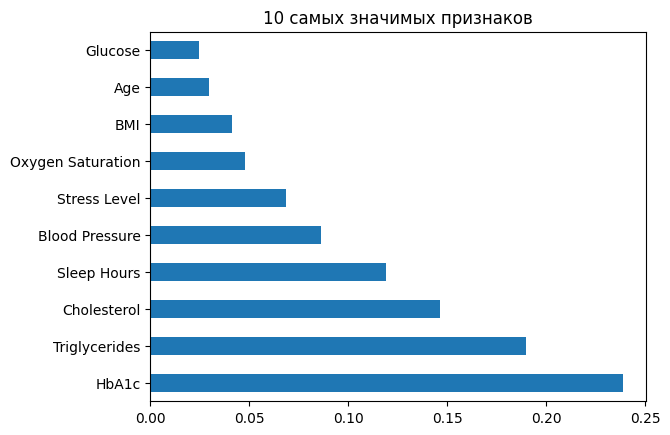

In [415]:
importances = rf.feature_importances_
feat_imp = pd.Series(importances, index=X.columns).sort_values(ascending=False)
feat_imp.head(10).plot(kind='barh')
plt.title('10 самых значимых признаков')
plt.show()

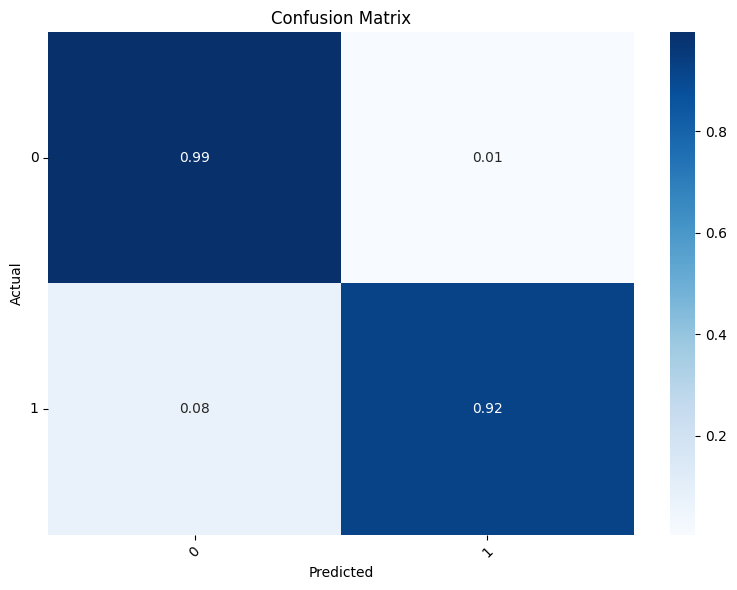

In [416]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_test_pred, normalize="true")

plt.figure(figsize=(8, 6))
sns.heatmap(
    cm,
    annot=True,
    fmt='.2f',
    cmap='Blues',
    xticklabels=(0, 1),
    yticklabels=(0, 1)
)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

## KNN
Устойчив к выбросам. Но плохое определение значимости.

### X и y

In [417]:
X = table_normalized.drop(columns=[prediction_value] + values_too_correlate, errors="ignore")
y = table_normalized[prediction_value]
#y = y.to_numpy()
feature_names = X.columns
#X = X.to_numpy()
N, d = X.shape

In [418]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

N_train, _ = X_train.shape
N_test, _ = X_test.shape

(N_train, N_test)

(20400, 5100)

In [419]:
pd.DataFrame(y_train).describe()

,Healthy
count,20400.000000
mean,0.119167
std,0.323992
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


### Предварительная балансировка

In [420]:
X_train_balanced, y_train_balanced = (X_train, y_train)

In [421]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(k_neighbors=5, random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)
N_train_balanced, _ = X_train_balanced.shape
(N_train_balanced, N_test)

(35938, 5100)

In [422]:
pd.DataFrame(y_train_balanced).describe()

,Healthy
count,35938.000000
mean,0.500000
std,0.500007
min,0.000000
25%,0.000000
50%,0.500000
75%,1.000000
max,1.000000


### Классификация

In [423]:
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=20, weights="distance", n_jobs=-1)
neigh.fit(X_train_balanced, y_train_balanced)

y_train_pred = neigh.predict(X_train_balanced)
y_test_pred = neigh.predict(X_test)

### Оценка

In [424]:
err_train = np.mean(y_train_balanced != neigh.predict(X_train_balanced))
err_test = np.mean(y_test != neigh.predict(X_test))

print(err_train, err_test)

0.0 0.04098039215686274


In [425]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred, zero_division=np.nan))

              precision    recall  f1-score   support

           0       1.00      0.95      0.98      4492
           1       0.74      1.00      0.85       608

    accuracy                           0.96      5100
   macro avg       0.87      0.98      0.91      5100
weighted avg       0.97      0.96      0.96      5100



In [426]:
np.sum(rf.feature_importances_)

np.float64(1.0)

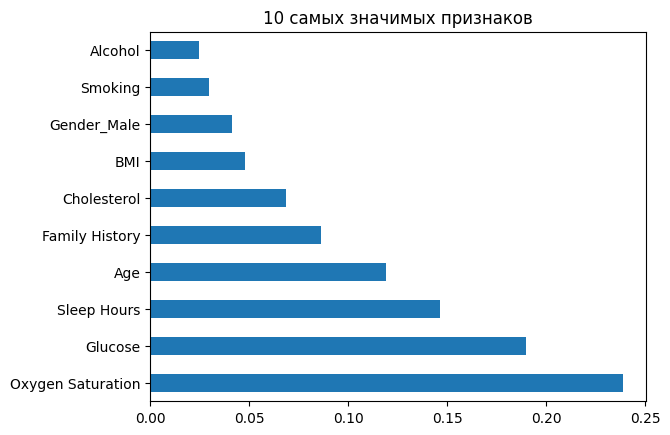

In [427]:
importances = rf.feature_importances_
feat_imp = pd.Series(importances, index=X.columns).sort_values(ascending=False)
feat_imp.head(10).plot(kind='barh')
plt.title('10 самых значимых признаков')
plt.show()

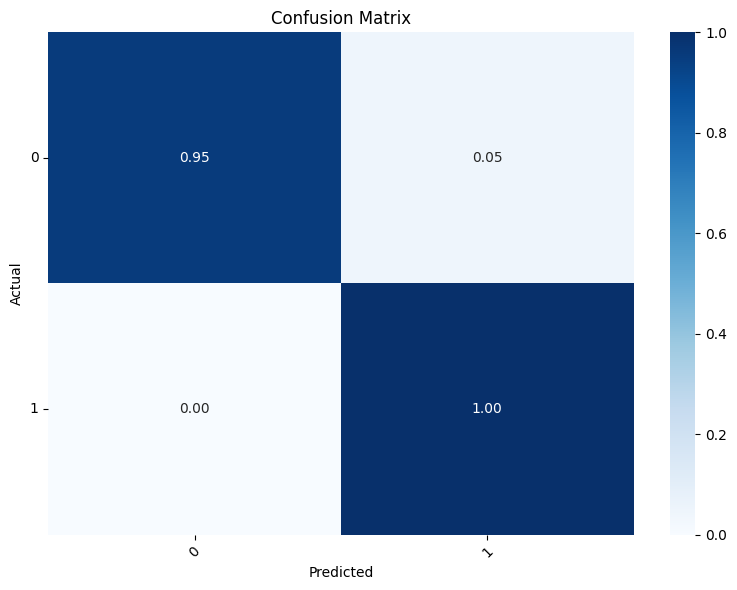

In [428]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_test_pred, normalize="true")

plt.figure(figsize=(8, 6))
sns.heatmap(
    cm,
    annot=True,
    fmt='.2f',
    cmap='Blues',
    xticklabels=(0, 1),
    yticklabels=(0, 1)
)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

## Gradient Boosting
Будет хорошо работать, поскольку немного признаков и достаточно много наблюдений. Устойчив к выбросам.

### X и y

In [429]:
X = table.drop(columns=[prediction_value] + values_too_correlate, errors="ignore")
y = table[prediction_value]
#y = y.to_numpy()
feature_names = X.columns
#X = X.to_numpy()
N, d = X.shape

In [430]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

N_train, _ = X_train.shape
N_test, _ = X_test.shape

(N_train, N_test)

(20400, 5100)

In [431]:
pd.DataFrame(y_train).describe()

,Healthy
count,20400.000000
mean,0.119167
std,0.323992
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


### Предварительная балансировка

In [432]:
X_train_balanced, y_train_balanced = (X_train, y_train)

In [433]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(k_neighbors=5, random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)
N_train_balanced, _ = X_train_balanced.shape
(N_train_balanced, N_test)

(35938, 5100)

In [434]:
pd.DataFrame(y_train_balanced).describe()

,Healthy
count,35938.000000
mean,0.500000
std,0.500007
min,0.000000
25%,0.000000
50%,0.500000
75%,1.000000
max,1.000000


### Классификация

In [435]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.5, random_state=42)
gb.fit(X_train_balanced, y_train_balanced)

y_train_pred = gb.predict(X_train_balanced)
y_test_pred = gb.predict(X_test)

### Оценка

In [436]:
err_train = np.mean(y_train_balanced != gb.predict(X_train_balanced))
err_test = np.mean(y_test != gb.predict(X_test))

print(err_train, err_test)

0.0012243307919194168 0.012941176470588235


In [437]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred, zero_division=np.nan))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4492
           1       0.93      0.96      0.95       608

    accuracy                           0.99      5100
   macro avg       0.96      0.98      0.97      5100
weighted avg       0.99      0.99      0.99      5100



In [438]:
np.sum(rf.feature_importances_)

np.float64(1.0)

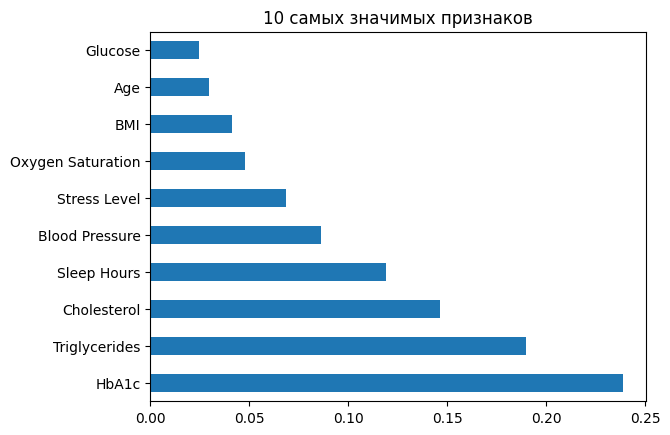

In [439]:
importances = rf.feature_importances_
feat_imp = pd.Series(importances, index=X.columns).sort_values(ascending=False)
feat_imp.head(10).plot(kind='barh')
plt.title('10 самых значимых признаков')
plt.show()

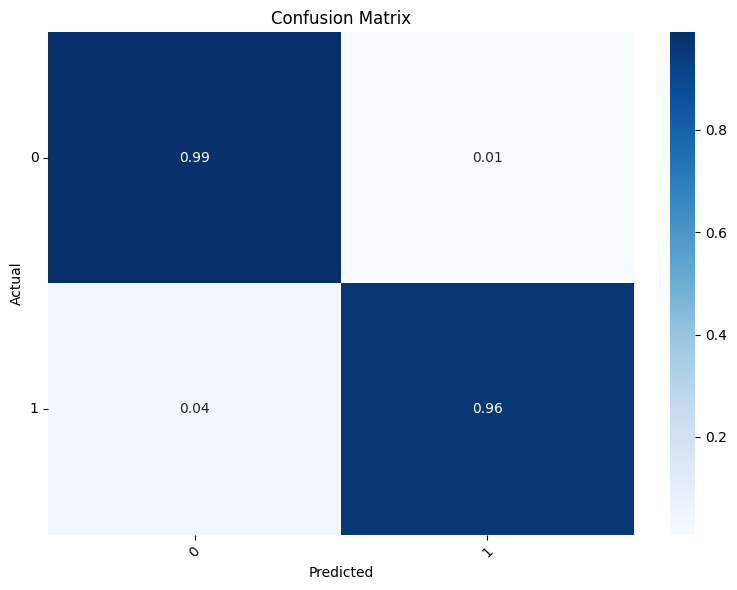

In [440]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_test_pred, normalize="true")

plt.figure(figsize=(8, 6))
sns.heatmap(
    cm,
    annot=True,
    fmt='.2f',
    cmap='Blues',
    xticklabels=(0, 1),
    yticklabels=(0, 1)
)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

## Вывод
Gradient Boosting, KNN и Random Forest показали отличные результаты. Поскольку нам важна метрика recall для класса 0 (верно предсказано, что человек нездоров), выходит, что результат у KNN хуже остальных. Также у Random Forest немного хуже recall для класса 1 (то есть хуже предсказывает, что человек здоров).

Выходит, что в этой задаче лучше всего подойдёт Gradient Boosting.
